# Fake News Detector

In [107]:
# Import dependencies
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Data

In [97]:
# We will be using a labeled dataset with 6335 observations each with 3 columns.
# Title is the title of the news article, text is the text, and label is wether or 
# not it was classified as fake or real.
df = pd.read_csv('../FakeNews/news.csv')

In [96]:
df.shape

(6335, 4)

In [95]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
# Extracting the label for training
labels=df.label

In [6]:
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

# Modeling

In [8]:
# Splitting the data
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=9)

In [89]:
# Using TfidfVectorizer we can transform the text from our dataset into vectors that can be
# used to train our model. The stop words are common words that appear in the english langauge
# and setting a max_df or Max document frequency, which is the threshold frequency that these
# words appear we can filter them out before we train our model
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [10]:
# Now we fit and transform the vectorizer on the train set, and transform the vectorizer on the test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [98]:
# Now we can apply the PAC on our training and test data
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.53%


In [110]:
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
disp = ConfusionMatrixDisplay(cm, display_labels=['FAKE', 'REAL'])

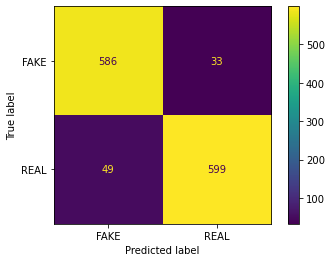

In [112]:
disp.plot()